In [9]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz

In [10]:
# Here I took random csvs but used random seed 42 to get the same randomized dataset each time.

random.seed(42)

no_sepsis_path = "sepsis_dataset-2/dataset/no_sepsis"
sepsis_path = "sepsis_dataset-2/dataset/sepsis"
num_files_to_pick = 750

def select_random_files(folder_path, num_files):
    files = os.listdir(folder_path)
    selected_files = random.sample(files, num_files)
    return [os.path.join(folder_path, file) for file in selected_files]

In [11]:
selected_no_sepsis = select_random_files(no_sepsis_path, num_files_to_pick)
selected_sepsis = select_random_files(sepsis_path, num_files_to_pick)

selected_files = selected_no_sepsis + selected_sepsis

print(f"Selected {len(selected_no_sepsis)} 'no_sepsis' files and {len(selected_sepsis)} 'sepsis' files.")

Selected 750 'no_sepsis' files and 750 'sepsis' files.


In [12]:
selected_no_sepsis

['sepsis_dataset-2/dataset/no_sepsis\\688.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\200.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\120.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\782.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\351.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\323.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\303.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\226.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\778.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\192.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\721.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\781.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\920.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\600.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\179.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\642.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\488.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\127.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\125.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\184.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\3.

In [13]:
# This function below takes all csvs and merges their mean values so from 1200 csvs it returns a 1200 row, merged dataset.
def load_and_merge_csv(file_list):
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

In [14]:
merged_data = load_and_merge_csv(selected_files)

print(f"Merged data shape: {merged_data.shape}")

Merged data shape: (36000, 27)


In [15]:
merged_data.head()

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,85.0,122.0,59.0,74.0,29.0,35.500000,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,62.84,1.0,0.0,0.0
1,88.0,110.0,57.0,70.0,21.0,35.500000,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,62.84,1.0,0.0,0.0
2,91.0,110.0,60.0,72.0,20.0,36.277778,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,62.84,0.0,0.0,0.0
3,97.0,114.0,51.0,65.0,19.0,36.277778,99.0,NaN,13.2,12.0,...,28.0,11.3,32.5,3.7,88.0,15.0,62.84,1.0,0.0,0.0
4,99.0,90.0,50.0,61.0,18.0,36.277778,96.0,NaN,13.2,12.0,...,28.0,11.3,32.5,3.7,88.0,15.0,62.84,1.0,0.0,0.0


In [16]:
merged_data = merged_data.sample(frac=1).reset_index(drop=True)

In [17]:
merged_data

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,65.0,134.0,72.0,92.666702,17.0,36.555557,95.0,NaN,6.1,16.0,...,24.0,14.4,40.0,4.3,102.0,NaN,91.40,0.0,0.0,0.0
1,104.0,110.0,54.0,67.000000,20.0,37.833333,95.0,40.0,20.5,27.0,...,31.0,10.0,28.7,3.1,101.0,10.0,50.73,1.0,0.0,1.0
2,60.0,122.0,47.0,72.000000,19.0,35.722224,100.0,NaN,14.7,75.0,...,20.0,10.9,32.2,6.6,110.0,7.0,72.14,1.0,0.0,0.0
3,99.0,112.0,70.0,78.000000,16.0,36.277778,100.0,50.0,6.7,212.0,...,22.0,8.7,23.8,4.9,96.0,10.0,62.21,0.0,0.0,1.0
4,87.0,146.0,79.0,101.333000,17.0,35.833333,96.0,NaN,4.6,9.0,...,30.0,12.6,37.4,3.4,105.0,15.0,72.09,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,109.0,181.0,85.0,115.000000,33.0,37.166668,94.0,NaN,13.9,18.0,...,22.0,10.2,28.6,4.7,111.0,15.0,53.15,1.0,0.0,0.0
35996,72.0,96.0,53.0,68.000000,16.0,36.166666,100.0,NaN,13.3,15.0,...,22.0,11.8,34.0,3.8,115.0,10.0,51.39,0.0,1.0,0.0
35997,119.0,NaN,NaN,80.000000,19.0,36.888889,97.0,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,71.60,0.0,0.0,0.0
35998,73.0,152.0,56.0,80.000000,20.0,37.111111,100.0,NaN,9.0,11.0,...,22.0,12.6,37.9,3.6,114.0,15.0,53.20,0.0,0.0,0.0


Below, I did some visualization to detect correlations etc.

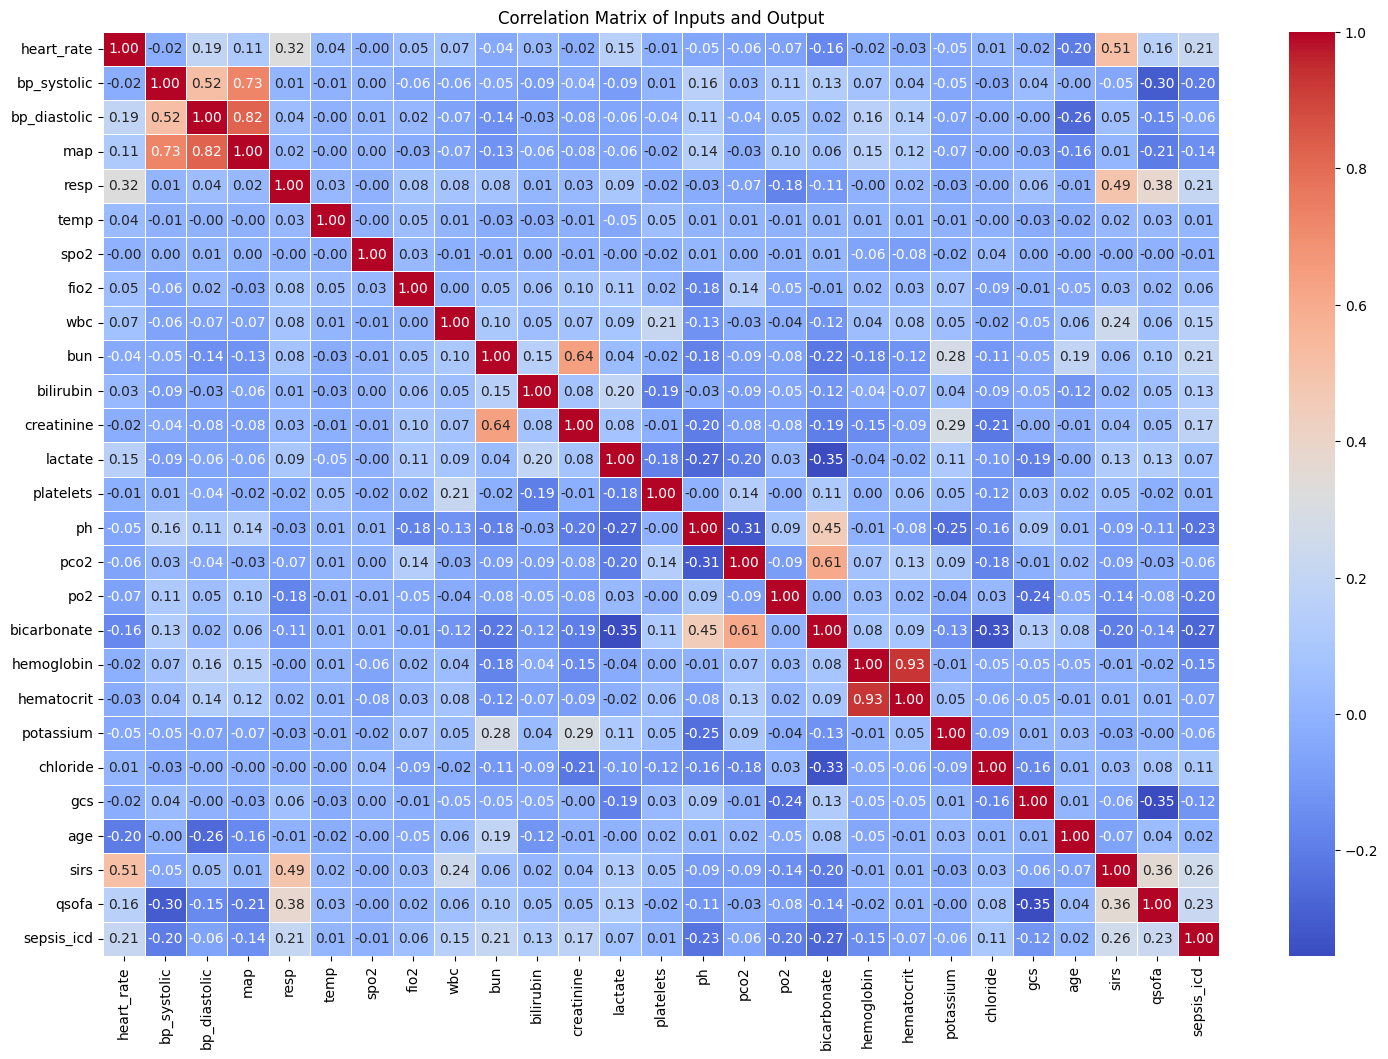

In [18]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Inputs and Output")
plt.show()

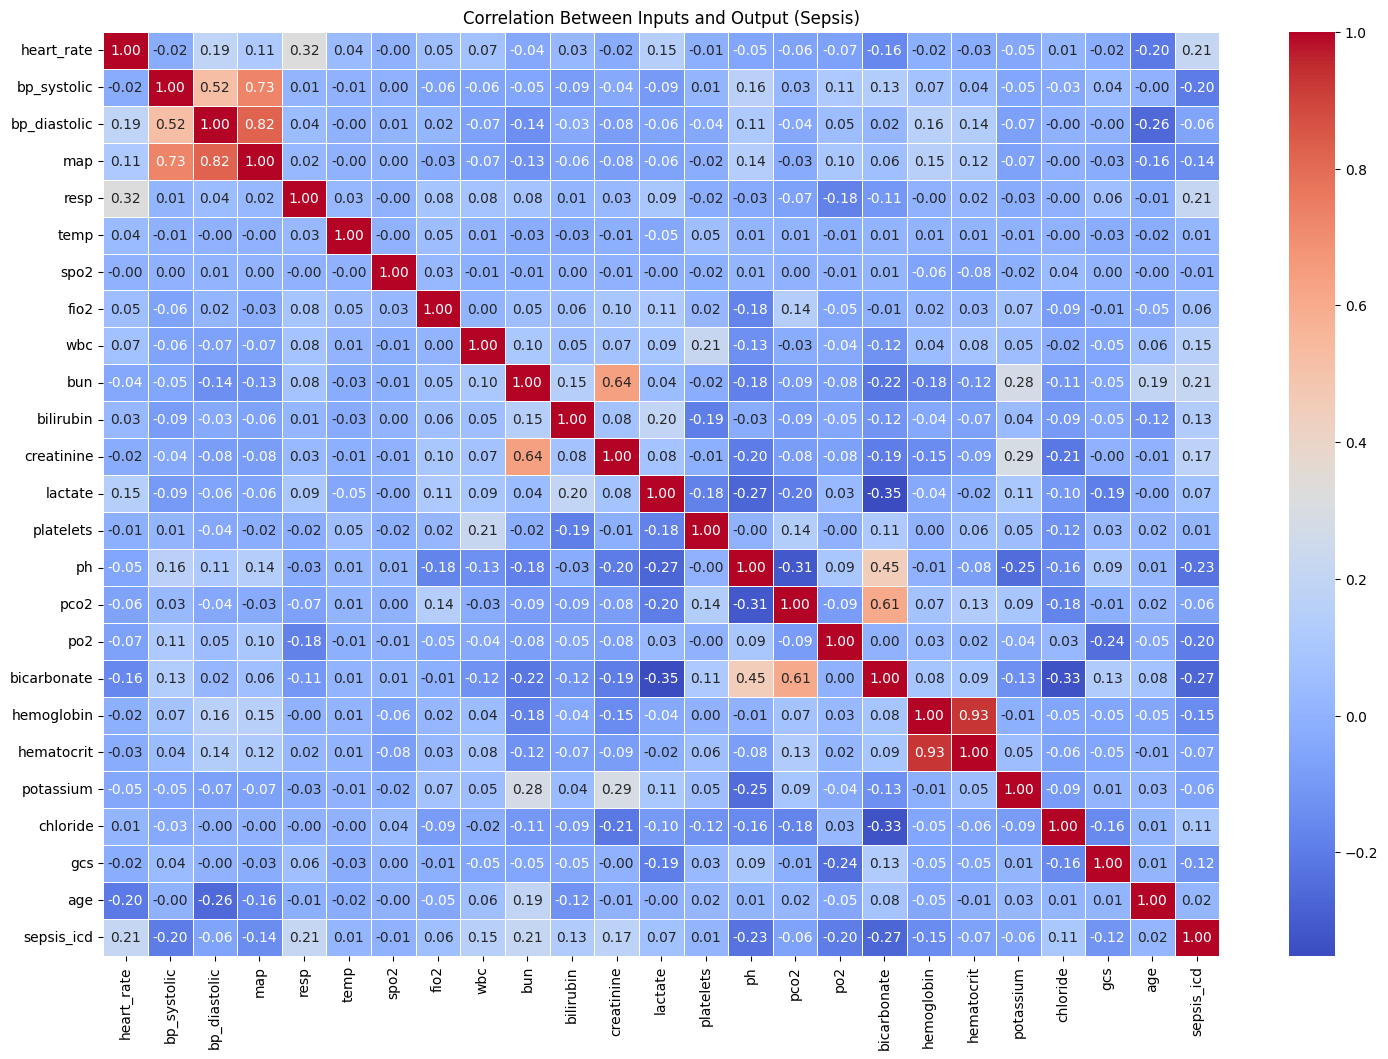

In [19]:
input_columns = ["heart_rate", "bp_systolic", "bp_diastolic", "map", "resp", "temp", "spo2", "fio2", "wbc", "bun", "bilirubin", "creatinine", "lactate", "platelets", "ph", "pco2", "po2", "bicarbonate", "hemoglobin", "hematocrit", "potassium", "chloride", "gcs", "age"]
output_column = 'sepsis_icd'

input_output_corr = merged_data[input_columns + [output_column]].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(input_output_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Inputs and Output (Sepsis)")
plt.show()

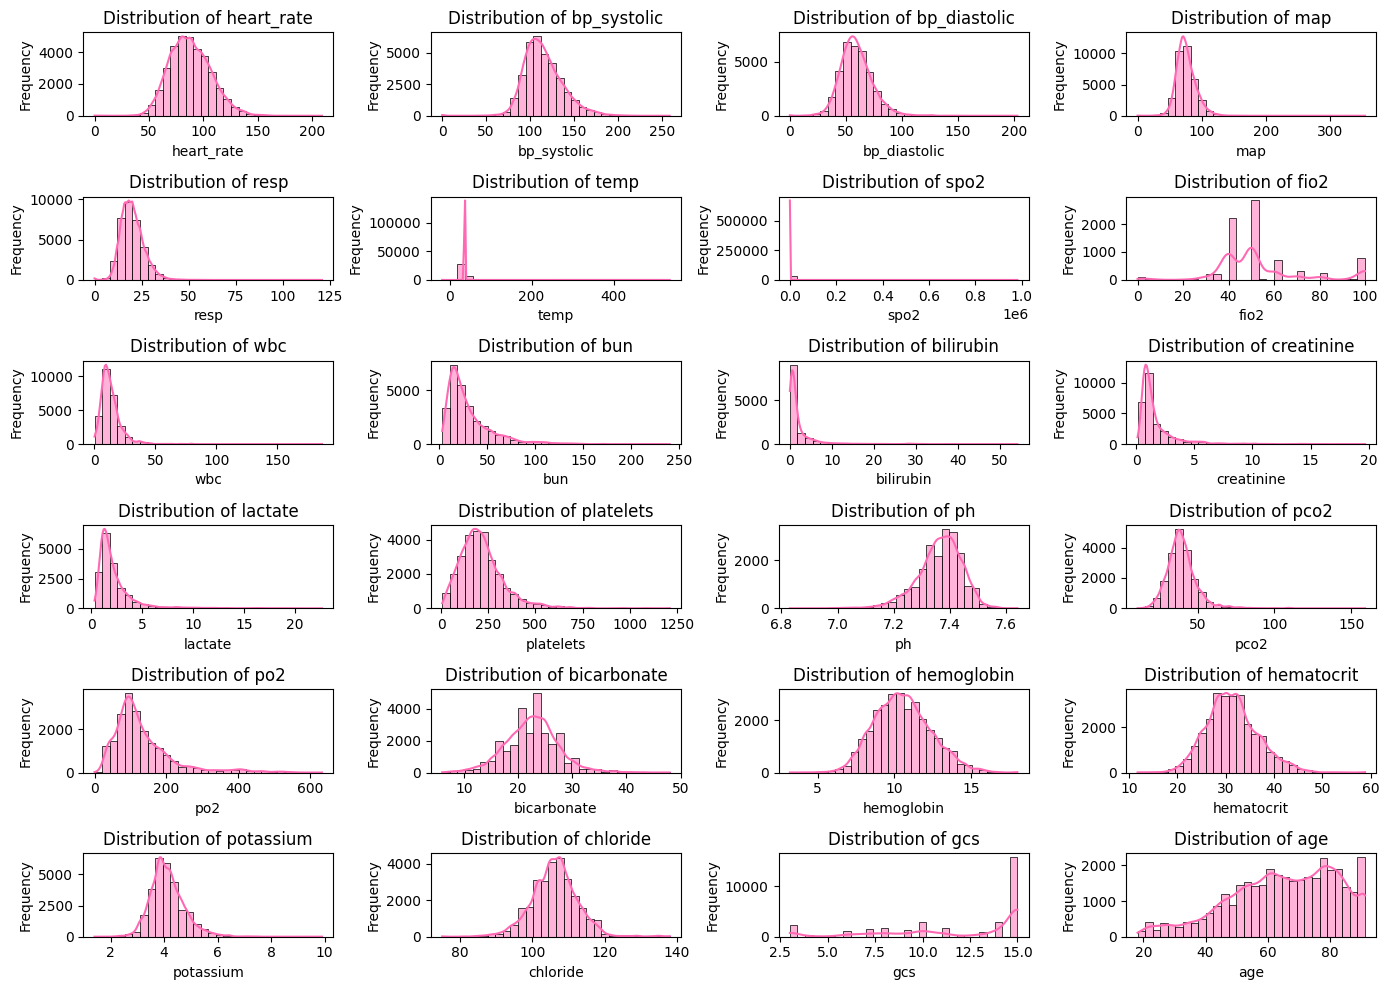

In [20]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(input_columns, 1):
    plt.subplot(6, 4, i)
    sns.histplot(merged_data[column], kde=True, color='hotpink', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

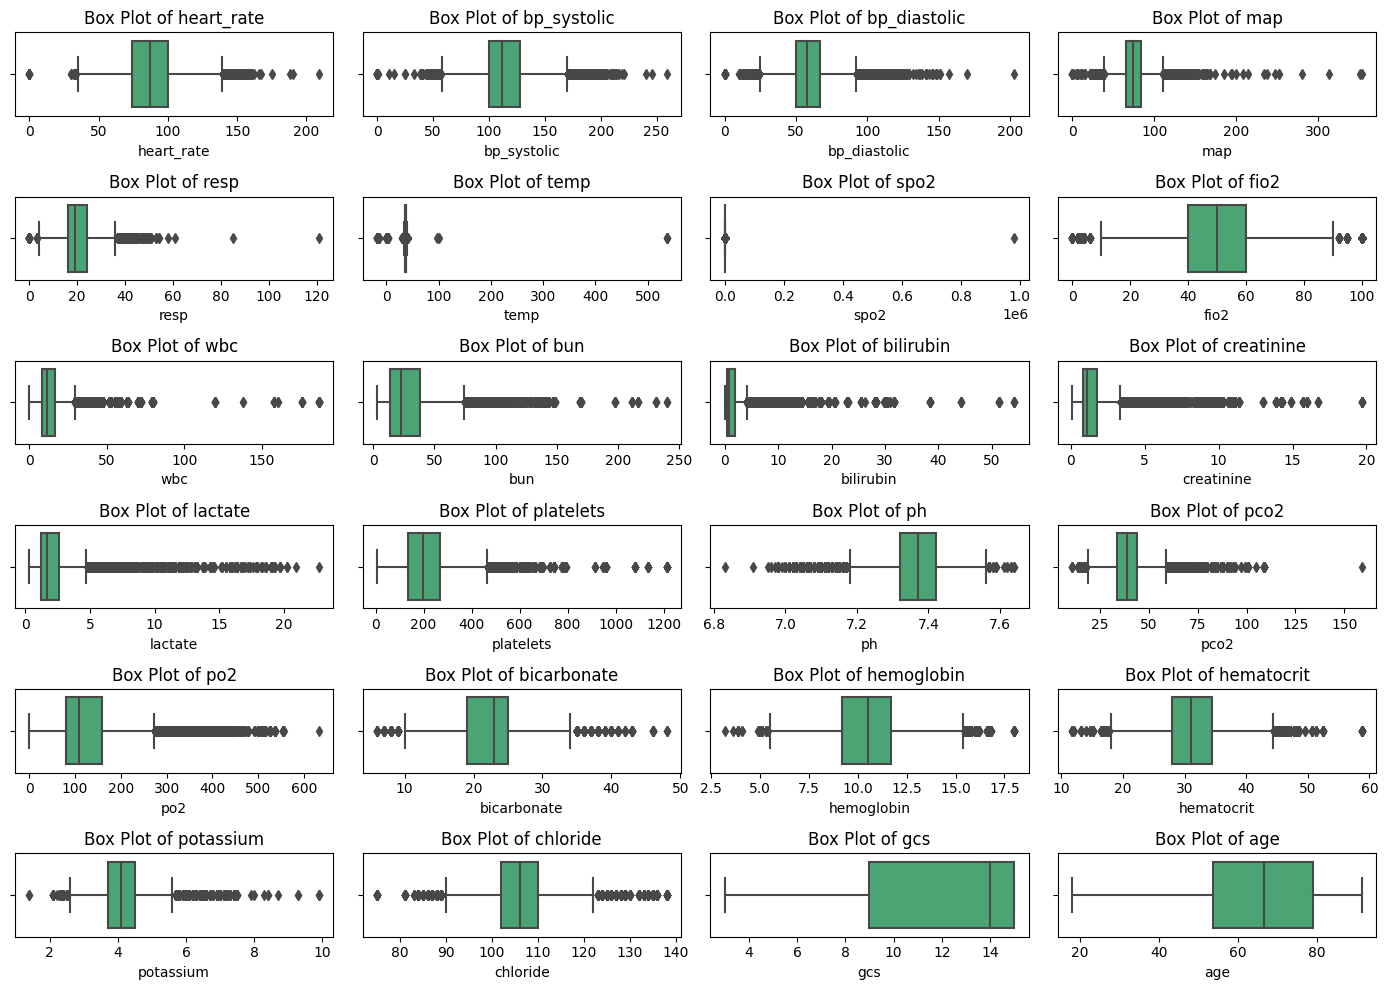

In [21]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(input_columns, 1):
    plt.subplot(6,4, i)
    sns.boxplot(x=merged_data[column], color='mediumseagreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [22]:
stats = merged_data[input_columns].agg(['min', 'max', 'std']).transpose()
stats.columns = ['Min', 'Max', 'Standard Deviation']

print("Statistical Summary of Parameters:")
print(stats)

# Count the number of positive (sepsis=1) and negative (sepsis=0) instances
positive_instances = merged_data[merged_data['sepsis_icd'] == 1].shape[0]
negative_instances = merged_data[merged_data['sepsis_icd'] == 0].shape[0]

print("\nNumber of Positive and Negative Instances:")
print(f"Positive Instances (Sepsis=1): {positive_instances}")
print(f"Negative Instances (Sepsis=0): {negative_instances}")

Statistical Summary of Parameters:
                    Min            Max  Standard Deviation
heart_rate     0.000000     209.000000           18.881211
bp_systolic    0.000000     259.000000           22.038648
bp_diastolic   0.000000     203.000000           14.343378
map            0.000000     354.000000           15.424936
resp           0.000000     121.000000            6.008347
temp         -17.777778     536.388889            5.733223
spo2           0.000000  981023.000000         5304.551773
fio2           0.000000     100.000000           20.030862
wbc            0.100000     186.600000           10.014912
bun            3.000000     240.000000           24.062890
bilirubin      0.000000      54.200000            4.342174
creatinine     0.100000      19.700000            1.697316
lactate        0.300000      22.700000            2.016365
platelets      6.000000    1212.000000          119.113204
ph             6.830000       7.640000            0.079133
pco2          11.0000

In [23]:
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])

heart_rate       1663
bp_systolic      1709
bp_diastolic     1710
map              1757
resp             1604
temp             2598
spo2             1804
fio2            28154
wbc              8842
bun              8089
bilirubin       23787
creatinine       8056
lactate         18196
platelets        8396
ph              15769
pco2            16714
po2             16709
bicarbonate      8150
hemoglobin       7981
hematocrit       7796
potassium        6845
chloride         7655
gcs              2952
age               869
sirs              869
qsofa             869
sepsis_icd        869
dtype: int64


In [24]:
low_missing_cols = merged_data.columns[(merged_data.isnull().mean() < 0.2) & (merged_data.isnull().mean() > 0)]
low_missing_cols

Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'potassium', 'gcs', 'age', 'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')

In [25]:
for col in low_missing_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Drop high missingness columns (>50%)
high_missing_cols = merged_data.columns[merged_data.isnull().mean() > 0.4]
print(high_missing_cols)
merged_data.drop(columns=high_missing_cols, inplace=True)

# Verify remaining nulls and columns
print("Remaining null values:")
print(merged_data.isnull().sum())
print("\nRemaining columns:")
print(merged_data.columns)

Index(['fio2', 'bilirubin', 'lactate', 'ph', 'pco2', 'po2'], dtype='object')
Remaining null values:
heart_rate         0
bp_systolic        0
bp_diastolic       0
map                0
resp               0
temp               0
spo2               0
wbc             8842
bun             8089
creatinine      8056
platelets       8396
bicarbonate     8150
hemoglobin      7981
hematocrit      7796
potassium          0
chloride        7655
gcs                0
age                0
sirs               0
qsofa              0
sepsis_icd         0
dtype: int64

Remaining columns:
Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'platelets', 'bicarbonate',
       'hemoglobin', 'hematocrit', 'potassium', 'chloride', 'gcs', 'age',
       'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')


In [27]:
moderate_missing_cols = ['wbc', 'bun', 'creatinine', 'platelets', 'bicarbonate', 'hemoglobin', 'hematocrit', 'chloride']
for col in moderate_missing_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Verify final dataset
print("Remaining null values:")
print(merged_data.isnull().sum())
print("\nFinal columns:")
print(merged_data.columns)

Remaining null values:
heart_rate      0
bp_systolic     0
bp_diastolic    0
map             0
resp            0
temp            0
spo2            0
wbc             0
bun             0
creatinine      0
platelets       0
bicarbonate     0
hemoglobin      0
hematocrit      0
potassium       0
chloride        0
gcs             0
age             0
sirs            0
qsofa           0
sepsis_icd      0
dtype: int64

Final columns:
Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'platelets', 'bicarbonate',
       'hemoglobin', 'hematocrit', 'potassium', 'chloride', 'gcs', 'age',
       'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')


In [28]:
correlation_matrix = merged_data.corr()

correlation_with_target = correlation_matrix['sepsis_icd'].sort_values(ascending=False)
print(correlation_with_target)

sepsis_icd      1.000000
sirs            0.229388
heart_rate      0.206950
qsofa           0.205661
resp            0.200922
bun             0.183568
creatinine      0.152985
wbc             0.134069
chloride        0.093653
age             0.017166
temp            0.014304
platelets       0.008560
spo2           -0.005437
potassium      -0.051032
bp_diastolic   -0.060015
hematocrit     -0.063354
gcs            -0.100210
hemoglobin     -0.129796
map            -0.139743
bp_systolic    -0.197961
bicarbonate    -0.239427
Name: sepsis_icd, dtype: float64


In [32]:
threshold = 0.18   # I picked this threshold to continue on my analysis with only the most relevant features

selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

print("\nSelected features based on correlation with target:")
print(selected_features)


Selected features based on correlation with target:
['sepsis_icd', 'sirs', 'heart_rate', 'qsofa', 'resp', 'bun', 'bp_systolic', 'bicarbonate']


In [33]:
# New dataset with only the selected features
selected_data = merged_data[selected_features]

# Shape of the selected dataset
print("\nShape of the dataset with selected features:")
print(selected_data.shape)


Shape of the dataset with selected features:
(36000, 8)


In [34]:
correlation_matrix_filtered = selected_data.corr()
correlation_with_target = correlation_matrix_filtered['sepsis_icd'].sort_values(ascending=False)
print(correlation_with_target)

sepsis_icd     1.000000
sirs           0.229388
heart_rate     0.206950
qsofa          0.205661
resp           0.200922
bun            0.183568
bp_systolic   -0.197961
bicarbonate   -0.239427
Name: sepsis_icd, dtype: float64


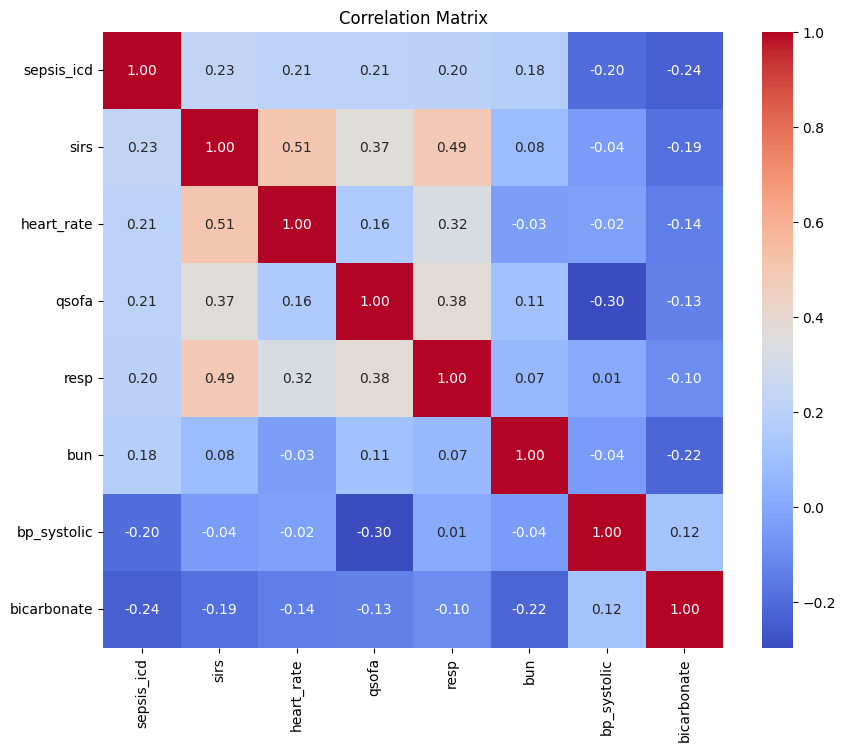

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [36]:
print("Available columns in filtered dataset:")
print(correlation_matrix_filtered.columns)

Available columns in filtered dataset:
Index(['sepsis_icd', 'sirs', 'heart_rate', 'qsofa', 'resp', 'bun',
       'bp_systolic', 'bicarbonate'],
      dtype='object')


In [37]:
input_columns_filtered = [col for col in input_columns if col in correlation_matrix_filtered.columns]
print("Filtered input columns:")
print(input_columns_filtered)

Filtered input columns:
['heart_rate', 'bp_systolic', 'resp', 'bun', 'bicarbonate']


In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(selected_data[input_columns_filtered])
y = selected_data[output_column].values
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Shape of X: (36000, 5), Shape of y: (36000,)


In [39]:
selected_data

,sepsis_icd,sirs,heart_rate,qsofa,resp,bun,bp_systolic,bicarbonate
0,0.0,0.0,65.0,0.0,17.0,16.0,134.0,24.0
1,1.0,1.0,104.0,0.0,20.0,27.0,110.0,31.0
2,0.0,1.0,60.0,0.0,19.0,75.0,122.0,20.0
3,1.0,0.0,99.0,0.0,16.0,212.0,112.0,22.0
4,0.0,0.0,87.0,0.0,17.0,9.0,146.0,30.0
...,...,...,...,...,...,...,...,...
35995,0.0,1.0,109.0,0.0,33.0,18.0,181.0,22.0
35996,0.0,0.0,72.0,1.0,16.0,15.0,96.0,22.0
35997,0.0,0.0,119.0,0.0,19.0,23.0,112.0,23.0
35998,0.0,0.0,73.0,0.0,20.0,11.0,152.0,22.0


## ANFIS Components
- <b>Fuzzy Inputs and Membership Functions</b><br>
Define membership functions for the input variables (e.g., Gaussian, triangular).

- <b>Fuzzy Rules</b><br>
Create fuzzy if-then rules based on your data (e.g., "If heart rate is high, then sepsis is likely").

- <b>Fuzzy Inference</b><br>
Use the Mamdani or Takagi-Sugeno inference system (ANFIS typically uses Takagi-Sugeno).

- <b>Defuzzification</b><br>
Compute crisp output from the fuzzy inference system.

- <b>Learning</b><br>
Use gradient descent or another optimization method to tune parameters of the membership functions.



In [40]:
selected_data = selected_data.drop(columns=['sirs', 'qsofa'])

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim

In [42]:
selected_data

,sepsis_icd,heart_rate,resp,bun,bp_systolic,bicarbonate
0,0.0,65.0,17.0,16.0,134.0,24.0
1,1.0,104.0,20.0,27.0,110.0,31.0
2,0.0,60.0,19.0,75.0,122.0,20.0
3,1.0,99.0,16.0,212.0,112.0,22.0
4,0.0,87.0,17.0,9.0,146.0,30.0
...,...,...,...,...,...,...
35995,0.0,109.0,33.0,18.0,181.0,22.0
35996,0.0,72.0,16.0,15.0,96.0,22.0
35997,0.0,119.0,19.0,23.0,112.0,23.0
35998,0.0,73.0,20.0,11.0,152.0,22.0


In [43]:
# Gaussian Membership Function
def gaussian_mf(x, mean, sigma):
    return torch.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

In [44]:
# Compute Rule Activations for a Batch
def batch_rule_activation(inputs, rules, fuzzy_sets):
    batch_size = inputs.size(0)
    num_rules = len(rules)
    rule_activations = torch.ones(batch_size, num_rules, dtype=torch.float32)

    for rule_idx, rule in enumerate(rules):
        for feature, fuzzy_set_name in rule['conditions'].items():
            feature_idx = feature_index_map[feature]
            fuzzy_set_details = next(
                item for item in fuzzy_sets[feature] if item['name'] == fuzzy_set_name
            )
            mean = torch.tensor(fuzzy_set_details['mean'], dtype=torch.float32)
            sigma = torch.tensor(fuzzy_set_details['sigma'], dtype=torch.float32)
            input_values = inputs[:, feature_idx]
            mf_output = gaussian_mf(input_values, mean, sigma)
            rule_activations[:, rule_idx] *= mf_output

    return rule_activations

In [45]:
# ANFIS Model
class ANFIS(nn.Module):
    def __init__(self, num_rules):
        super(ANFIS, self).__init__()
        self.output_weights = nn.Parameter(torch.randn(num_rules))

    def forward(self, rule_activations):
        weighted_outputs = rule_activations * self.output_weights
        total_activation = torch.sum(rule_activations, dim=1)
        total_activation[total_activation == 0] = 1e-6  # Avoid division by zero
        return torch.sum(weighted_outputs, dim=1) / total_activation

In [46]:
# Training Function
def train_anfis(X, y, rules, fuzzy_sets, model, learning_rate, epochs, batch_size=32):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    dataset_size = len(X)
    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0

        # Shuffle the data
        indices = torch.randperm(dataset_size)
        X = X[indices]
        y = y[indices]

        for start_idx in range(0, dataset_size, batch_size):
            end_idx = min(start_idx + batch_size, dataset_size)
            batch_inputs = X[start_idx:end_idx]
            batch_targets = y[start_idx:end_idx]

            # Compute rule activations for the batch
            rule_activations = batch_rule_activation(batch_inputs, rules, fuzzy_sets)

            # Forward pass
            predictions = model(rule_activations)

            # Compute loss
            loss = criterion(predictions, batch_targets)
            total_loss += loss.item()

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Check accuracy
            correct_predictions += (torch.round(predictions) == batch_targets).sum().item()

        accuracy = correct_predictions / dataset_size * 100
        print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

In [47]:
# Generate Fuzzy Sets
def generate_fuzzy_sets(data):
    fuzzy_sets = {}
    for feature in data.columns:
        feature_values = data[feature].values
        low_mean = np.percentile(feature_values, 25)
        normal_mean = np.percentile(feature_values, 50)
        high_mean = np.percentile(feature_values, 75)
        sigma = (np.max(feature_values) - np.min(feature_values)) / 6
        fuzzy_sets[feature] = [
            {'name': 'Low', 'mean': low_mean, 'sigma': sigma},
            {'name': 'Normal', 'mean': normal_mean, 'sigma': sigma},
            {'name': 'High', 'mean': high_mean, 'sigma': sigma},
        ]
    return fuzzy_sets


heart_rate     0.206950
resp           0.200922
bun            0.183568
bp_systolic   -0.197961
bicarbonate   -0.239427

In [51]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

feature_index_map = {
    'heart_rate': 0,    # Feature 1 -> index 0
    'bp_systolic': 1,   # Feature 2 -> index 1
    'resp': 2,          # Feature 3 -> index 2
    'bun': 3,            # Feature 4 -> index 3
    'bicarbonate': 4    # Feature 5 -> index 4
}
fuzzy_sets = generate_fuzzy_sets(selected_data)

rules = [
    {'conditions': {'heart_rate': 'High', 'resp': 'High', 'bun': 'High'}, 'output': [1]},
    {'conditions': {'heart_rate': 'Low', 'bp_systolic': 'High', 'resp': 'Low'}, 'output': [0]},
    {'conditions': {'heart_rate': 'Normal', 'bp_systolic': 'Normal', 'resp': 'Normal'}, 'output': [1]},
    {'conditions': {'heart_rate': 'Low', 'resp': 'Low', 'bun': 'Low'}, 'output': [0]},
    {'conditions': {'bp_systolic': 'Low', 'bicarbonate': 'Low'}, 'output': [1]},
    {'conditions': {'bp_systolic': 'High', 'bicarbonate': 'Normal'}, 'output': [0]},
    {'conditions': {'heart_rate': 'Normal', 'bp_systolic': 'High', 'bicarbonate': 'Low'}, 'output': [1]},
]


C:\Users\zgebl\AppData\Local\Temp\ipykernel_26656\331708526.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\zgebl\AppData\Local\Temp\ipykernel_26656\331708526.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [49]:
print(X.shape)


torch.Size([36000, 5])


In [52]:
num_rules = len(rules)
anfis_model = ANFIS(num_rules)

train_anfis(X, y, rules, fuzzy_sets, anfis_model, learning_rate=0.01, epochs=100, batch_size=32)

predictions = []
with torch.no_grad():
    for i in range(0, len(X), 32):
        batch_inputs = X[i:i+32]
        rule_activations = batch_rule_activation(batch_inputs, rules, fuzzy_sets)
        batch_predictions = anfis_model(rule_activations)
        predictions.extend(batch_predictions.tolist())

print(predictions)

Epoch 1, Loss: 280.9932, Accuracy: 51.41%
Epoch 2, Loss: 280.9124, Accuracy: 51.38%
Epoch 3, Loss: 280.7517, Accuracy: 51.96%
Epoch 4, Loss: 280.6127, Accuracy: 51.41%
Epoch 5, Loss: 280.4054, Accuracy: 52.28%
Epoch 6, Loss: 280.3764, Accuracy: 52.34%
Epoch 7, Loss: 280.2113, Accuracy: 51.88%
Epoch 8, Loss: 280.0834, Accuracy: 52.38%
Epoch 9, Loss: 279.9392, Accuracy: 52.64%
Epoch 10, Loss: 279.8299, Accuracy: 53.24%
Epoch 11, Loss: 279.6372, Accuracy: 53.12%
Epoch 12, Loss: 279.4822, Accuracy: 53.51%
Epoch 13, Loss: 279.1532, Accuracy: 53.68%
Epoch 14, Loss: 279.2355, Accuracy: 54.24%
Epoch 15, Loss: 279.1105, Accuracy: 53.81%
Epoch 16, Loss: 279.0201, Accuracy: 53.74%
Epoch 17, Loss: 278.8797, Accuracy: 54.37%
Epoch 18, Loss: 278.6795, Accuracy: 54.41%
Epoch 19, Loss: 278.5619, Accuracy: 54.91%
Epoch 20, Loss: 278.4847, Accuracy: 54.21%
Epoch 21, Loss: 278.2607, Accuracy: 55.71%
Epoch 22, Loss: 278.2686, Accuracy: 54.27%
Epoch 23, Loss: 278.0868, Accuracy: 55.66%
Epoch 24, Loss: 277.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Ensure matching data types and dimensions
y_test = np.array(y_test)
log_reg_preds = np.array(log_reg_preds)
rf_preds = np.array(rf_preds)

# Evaluate Models
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy}")
print(classification_report(y_test, log_reg_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_preds))

print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

Logistic Regression Performance:
Accuracy: 0.7
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       150
         1.0       0.69      0.74      0.71       150

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

Confusion Matrix:
[[ 99  51]
 [ 39 111]]

Random Forest Performance:
Accuracy: 0.7133333333333334
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71       150
         1.0       0.71      0.72      0.72       150

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

Confusion Matrix:
[[106  44]
 [ 42 108]]
